### **Connecting with Kaggle**

In [ ]:
import os       ## accessing the underlying operating system of the virtual machine on which this colab runs, that is available in the OS namespace.
os.environ['KAGGLE_USERNAME'] = 'samarthnigam28'
os.environ['KAGGLE_KEY'] = '4e0c8acde475590b10b936aa33ffbc56'

### **Downloading the dataset**

In [ ]:
! kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Unzip the dataset**

In [ ]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

### **Importing Necessary Libraries**

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

### **Mapping Directories to Variables**

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'
classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

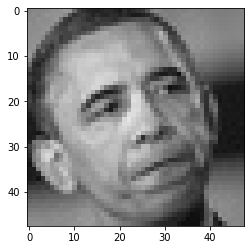

(48, 48, 3)

In [ ]:
for category in classes:
  path = os.path.join(train_dir,category)
  for image in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,image))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break
  
img_array.shape

### **Changing Image size**

In [ ]:
img_size = 224  ## changing the size of images as ImageNet consist in form 224 x 224
img_array = cv2.resize(img_array,(img_size,img_size))

img_array.shape

(224, 224, 3)

### **Assigning all the file names of the images of all the emotion classes in to the Python List**

In [ ]:
training_Data = []

for category in classes:
    path = os.path.join(train_dir,category)
    class_num = classes.index(category)  ## label (angry, disgust, ...)
    

    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(image, (img_size,img_size))
            training_Data.append([new_array,class_num])
        except Exception as e:
            pass

print(len(training_Data))
type(training_Data)

28709


list

### **Shuffling all the contents**

In [ ]:
import random
random.shuffle(training_Data)

### **Separating features and labels**

In [ ]:
X = []
Y = []

for features,label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)
X.shape

#X = X/255.0

(28709, 224, 224, 3)

In [ ]:
Y = np.array(Y)
Y.shape


(28709,)

### **Loading the MobileNetV2 Model**

In [ ]:
model = tf.keras.applications.MobileNetV2()

model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# transfer learning - Tuning, weights will start from last check point
base_input = model.layers[0].input
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

### **Compiling the Model**

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

### **Training the Model**

In [ ]:
new_model.fit(X,Y,epochs = 50)

Epoch 1/50
898/898 [==============================] - 209s 192ms/step - loss: 1.2553 - accuracy: 0.5262
Epoch 2/50
898/898 [==============================] - 177s 197ms/step - loss: 1.0736 - accuracy: 0.5980
Epoch 3/50
898/898 [==============================] - 179s 200ms/step - loss: 1.0019 - accuracy: 0.6274
Epoch 4/50
898/898 [==============================] - 180s 201ms/step - loss: 0.9445 - accuracy: 0.6498
Epoch 5/50
898/898 [==============================] - 177s 198ms/step - loss: 0.8915 - accuracy: 0.6701
Epoch 6/50
898/898 [==============================] - 176s 197ms/step - loss: 0.8390 - accuracy: 0.6895
Epoch 7/50
898/898 [==============================] - 177s 197ms/step - loss: 0.7867 - accuracy: 0.7100
Epoch 8/50
898/898 [==============================] - 176s 196ms/step - loss: 0.7385 - accuracy: 0.7270
Epoch 9/50
898/898 [==============================] - 178s 199ms/step - loss: 0.6872 - accuracy: 0.7478
Epoch 10/50
898/898 [==============================] - 178s 198m

### **Saving the Model**

In [ ]:
new_model.save('FinalModel.h5')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


### **Loading the Model**

In [2]:
import tensorflow as tf
new_model = tf.keras.models.load_model('FinalModel.h5')

## **Deploying the Model on Static Images**

### **Loading the static Image**

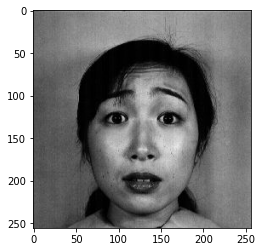

In [7]:
frame = cv2.imread('/content/pic1.jpg')
frame.shape
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### **Loading the Haarcascade Classifier**

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(256, 256)

### **Detecting the Face on the Image**

In [10]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

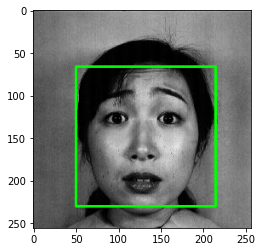

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

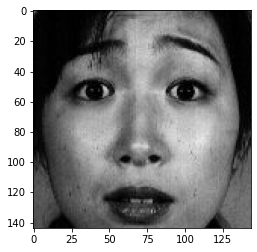

In [12]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [13]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

### **Making the Prediction of Emotions**

In [14]:
Predictions = new_model.predict(final_image)
Predictions[0]

array([0.25236785, 0.00538956, 0.2778771 , 0.13983479, 0.07813059,
       0.13318929, 0.11321084], dtype=float32)

In [15]:
np.argmax(Predictions)

2